In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import random #used to generate random numbers

In [3]:
import random #used to generate random numbers
X1 = [random.randint(500,2000)] #assigns a random number to X1 and turns it into a list
X2 = [random.randint(100,500)] #assigns a random number to X2 and turns it into a list
X3 = [X1[0] * 3 + random.randint(1,100)] #assigns value to X3 using the formula X1 * 3 + random_vector
Y = [X3[0] - X2[0]]

for i in range(1,51):
    num = 1
    X1.append(random.randint(500,2000))
    X2.append(random.randint(100,500))
    X3.append(X1[i] * 3 + random.randint(1,100))
    Y.append(X3[i] - X2[i])
    
    
print(X1)
print(X2)
print(X3)
print(Y)
print(len(Y))

[1738, 1262, 1746, 1090, 1239, 1961, 603, 673, 1516, 523, 1160, 1449, 670, 1141, 1982, 1754, 1011, 603, 893, 1399, 758, 622, 1430, 1733, 962, 1606, 1715, 1749, 892, 963, 1619, 539, 1942, 1258, 1523, 1459, 955, 1973, 616, 1355, 1022, 704, 546, 1928, 518, 723, 622, 780, 682, 1031, 1841]
[222, 369, 393, 396, 430, 333, 251, 249, 299, 199, 434, 448, 119, 255, 194, 149, 273, 294, 172, 366, 435, 149, 180, 212, 485, 115, 113, 219, 450, 147, 145, 212, 207, 232, 499, 417, 111, 169, 181, 109, 176, 229, 225, 306, 218, 445, 447, 204, 295, 120, 477]
[5253, 3815, 5331, 3340, 3726, 5908, 1828, 2053, 4571, 1575, 3506, 4424, 2048, 3515, 5998, 5333, 3051, 1874, 2693, 4244, 2335, 1907, 4368, 5217, 2914, 4839, 5147, 5268, 2744, 2988, 4929, 1681, 5851, 3813, 4583, 4430, 2907, 6007, 1882, 4085, 3067, 2155, 1669, 5848, 1604, 2196, 1906, 2388, 2120, 3123, 5537]
[5031, 3446, 4938, 2944, 3296, 5575, 1577, 1804, 4272, 1376, 3072, 3976, 1929, 3260, 5804, 5184, 2778, 1580, 2521, 3878, 1900, 1758, 4188, 5005, 2429, 

In [6]:
from scipy.stats import spearmanr, pearsonr

# calculate spearman's correlation
spearman_corr, _ = spearmanr(X1, Y)
print('Spearmans correlation between X1 and Y: %.3f' % spearman_corr)
# calculate pearsons' correlation
pearson_corr, _ = pearsonr(X1, Y)
print('Pearsons correlation between X1 and Y: %.3f' % pearson_corr)
print("\n")

spearman_corr, _ = spearmanr(X2, Y)
print('Spearmans correlation between X2 and Y: %.3f' % spearman_corr)
pearson_corr, _ = pearsonr(X2, Y)
print('Pearsons correlation between X2 and Y: %.3f' % pearson_corr)
print("\n")

spearman_corr, _ = spearmanr(X3, Y)
print('Spearmans correlation between X3 and Y: %.3f' % spearman_corr)
pearson_corr, _ = pearsonr(X3, Y)
print('Pearsons correlation between X3 and Y: %.3f' % pearson_corr)
print("\n")

Spearmans correlation between X1 and Y: 0.993
Pearsons correlation between X1 and Y: 0.996


Spearmans correlation between X2 and Y: -0.081
Pearsons correlation between X2 and Y: -0.068


Spearmans correlation between X3 and Y: 0.993
Pearsons correlation between X3 and Y: 0.997




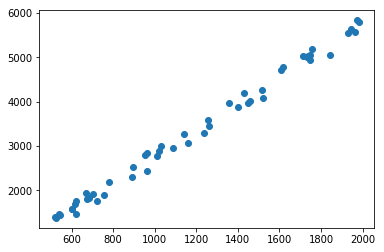

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X1, Y)

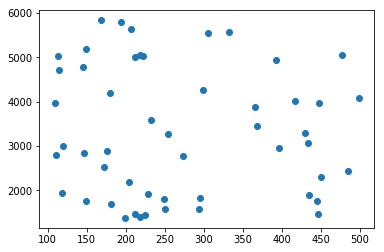

In [9]:
plt.scatter(X2, Y)

In [10]:
from pandas import DataFrame as df

data = {'X1': X1, 
        'X2': X2, 
        'X3': X3,
        'Y' : Y}
frame = df(data, columns=['X1', 'X2', 'X3', 'Y'])
#print(frame)

X_data = frame[['X1','X2']] #independent variable
Y_data = frame['Y'] #dependent variable

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30) #splits data 70/30 - train/test

from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 39.685907325834705
Coefficients: 
 [ 3.0007743  -1.00228949]


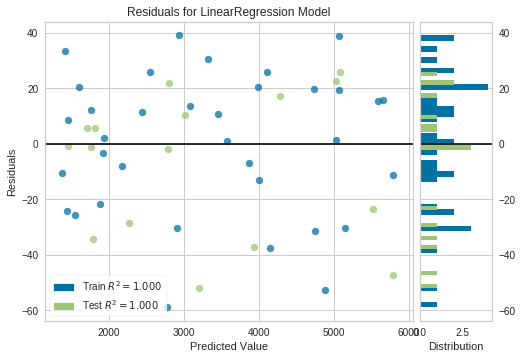

In [13]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show() 

In [14]:
from sklearn.metrics import r2_score

test_predicted = reg.predict(X_test)
#test_predicted

data = X_test.copy()
data['predicted_Y_value'] = test_predicted
data['Y_value'] = Y_test
#data.head()
#A score of 1 means it was a perfect prediction
print('Coefficient of Determination (R^2): %.2f' %r2_score(Y_test, test_predicted))




Coefficient of Determination (R^2): 1.00


In [15]:
import statsmodels.api as sm


X_data = sm.add_constant(X_data) # adding a constant
 
model = sm.OLS(Y_data, X_data).fit()
predictions = model.predict(X_data) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.633e+04
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           8.66e-85
Time:                        02:21:18   Log-Likelihood:                -237.14
No. Observations:                  51   AIC:                             480.3
Df Residuals:                      48   BIC:                             486.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9288     12.798      3.042      0.0

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


A high R-squared value means that the independent variables X1 and X2 are significant to Y

Y = (intercept) + (X1 coef) * X1 + (X2 coef) * X2

=> Y = (90.917) + (2.982)*X1 + (-1.016)*X2

In [16]:
#prediction using sklearn

new_X1 = 400
new_X2 = 50


print ('Predicted Y: \n', reg.predict([[new_X1 ,new_X2]]))

Predicted Y: 
 [1189.88115226]


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, test_predicted))
print("\nMean Squared Error: %.2f" % mean_squared_error(Y_test, test_predicted))
print("\nRoot Mean Squared Error: %.2f" % math.sqrt(mean_squared_error(Y_test, test_predicted)))

Mean Absolute Error: 21.00

Mean Squared Error: 688.11

Root Mean Squared Error: 26.23
